In [1]:
%matplotlib inline
from multinomial_logistic import getClassifierAndVectorizer
import numpy as np
import glob, os, pickle
import math
import pickle
import collections
import operator
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from time import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
print('test')

Multinomical LogisticRegression with Vector Featues
predicition on test set
test


In [2]:
clf, vectorizer = getClassifierAndVectorizer()

imported correctly


In [3]:

def extractor(n=10000):
    #n is number of opinions from each year"
    filename = "../sentences_new/"
    datafiles = sorted(glob.glob(filename + "sent_????"))
    test_files = []
    year = []
    cases_per_year = []
    y = 1891
    case_names = []
    a = 0
    for d in datafiles:
        sentences = sorted(glob.glob(d + "/*.txt"))
        for i, sentence in enumerate(sentences):
            if i >= n:
                break
            myfile = open(sentence,'r') 
            data=myfile.read().replace('\n', '')
            test_files.append(data)
            year.append(y)

            #adding case no and judge no.
            case_n = ""
            flag = False
            for j in sentence:
                if j == "X":
                    flag = True
                if j == "_":
                    flag = False
                if j == ".":
                    flag = False
                if flag == True:
                    case_n += j
            case_names.append(case_n)

            myfile.close()
        cases_per_year.append(len(sentences))
        y += 1
    print(a)
    return test_files, year, cases_per_year, case_names

def loadDataset(pklPath):
    with open(pklPath, "rb") as pklFile:
        return np.array(pickle.load(pklFile, encoding="utf-8"))

In [4]:
#get the data from the sentences
cases, year_of_case, cases_per_year, case_names = extractor()
#x_test = vectorizer.transform(cases)
#prediction = clf.predict(x_test)

0


In [5]:
prediction = loadDataset("predicitions.pickle")
print(len(prediction))


427315


In [19]:
fvl = loadDataset('court-test.pkl')



In [20]:
import os
fact = []
value = []
print(len(fvl))
for i in range(len(fvl)):
    dict_val = fvl[i]
    factVsValue = dict_val['label']
    x_featurizer = vectorizer.transform(dict_val['text'])
    ConsVsDeon = clf.predict(x_featurizer)
    if factVsValue == 1:
        fact.append(ConsVsDeon)
    elif factVsValue == 2:
        value.append(ConsVsDeon)


        
    


260322


In [21]:
factCons = 0
factDeon = 0
factOther = 0
ValCons = 0
ValDeon = 0
ValOther = 0

for i in fact:
    if i[0] == 'cons':
        factCons += 1
    elif i[0] == 'deon':
        factDeon += 1
    elif i[0] == 'other':
        factOther += 1

for i in value:
    if i[0] == 'cons':
        ValCons += 1
    elif i[0] == 'deon':
        ValDeon += 1
    elif i[0] == 'other':
        ValOther += 1

print("factcons:", factCons, "factdeon:", factDeon, "factother:", factOther)
print("valcons:", ValCons, "valdeon:", ValDeon, "valother:", ValOther)



factcons: 54527 factdeon: 4934 factother: 35593
valcons: 92317 valdeon: 7149 valother: 65802


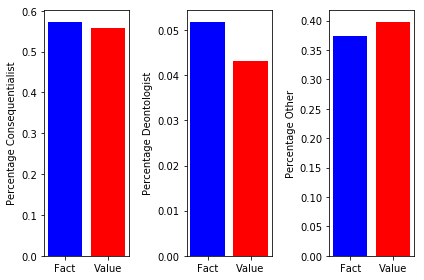

In [27]:

plt.subplot(1,3,1)
plt.bar("Fact", (factCons/(factCons+factDeon+factOther)), color='b',)
plt.bar("Value", (ValCons/(ValCons+ValDeon+ValOther)), color='r')
plt.ylabel("Percentage Consequentialist")
plt.subplot(1,3,2)
plt.bar("Fact", (factDeon/(factCons+factDeon+factOther)), color='b',)
plt.bar("Value", (ValDeon/(ValCons+ValDeon+ValOther)), color='r')
plt.ylabel("Percentage Deontologist")
plt.subplot(1,3,3)
plt.bar("Fact", (factOther/(factCons+factDeon+factOther)), color='b',)
plt.bar("Value", (ValOther/(ValCons+ValDeon+ValOther)), color='r')
plt.ylabel("Percentage Other")
plt.tight_layout()
plt.savefig("FactVal.png", dpi=300)

In [31]:
##old way for SVM, for multnimoal logistic see below:

n_grams = vectorizer.get_feature_names()
coef = clf.coef_[0].tolist()
#print(len(coef))
top = 10
predictors = []
#print(len(n_grams))
#print(len(coef))
for i in range(top):
    val = min(coef)
    index = coef.index(val)
    predictors.append([n_grams[index], val])
    n_grams.pop(index)
    coef.pop(index)
for i in range(top):
    val = max(coef)
    index = coef.index(val)
    predictors.append([n_grams[index], val])
    n_grams.pop(index)
    coef.pop(index)
#for i in predictors:
    #print (i ,"\n")

In [3]:
#getting the ngram ranking
ngram = vectorizer.get_feature_names()
ngram2d = np.asarray(ngram).reshape(len(ngram), 1)
print(ngram2d.shape)
ngram_feature = vectorizer.transform(ngram2d.ravel())
ngram_prediction = clf.decision_function(ngram_feature)

(437489, 1)


In [36]:
#getting dictionary of ngram with probabilities
cons_ngram = []
cons_nproba = []
deon_ngram = []
deon_nproba = []
for i, j in zip(ngram, ngram_prediction):
    j = j.tolist()
    max_proba = max(j)
    if j.index(max_proba) == 0:
        cons_ngram.append(i)
        cons_nproba.append(max_proba)
    elif j.index(max_proba)== 1:
        deon_ngram.append(i)
        deon_nproba.append(max_proba)

In [37]:
#word cloud setup
top = 200
predictors = []
deon_dic = dict()
cons_dic = dict()

for i in range(top):
    val = max(cons_nproba)
    index = cons_nproba.index(val)
    predictors.append([cons_ngram[index], val])
    flag = '\\x' in cons_ngram[index]
    if not flag:
        cons_dic[cons_ngram[index]] = abs(val)
        cons_ngram.pop(index)
        cons_nproba.pop(index)
for i in range(top):
    val = max(deon_nproba)
    index = deon_nproba.index(val)
    predictors.append([deon_ngram[index], val])
    deon_dic[deon_ngram[index]] = abs(val)
    deon_ngram.pop(index)
    deon_nproba.pop(index)

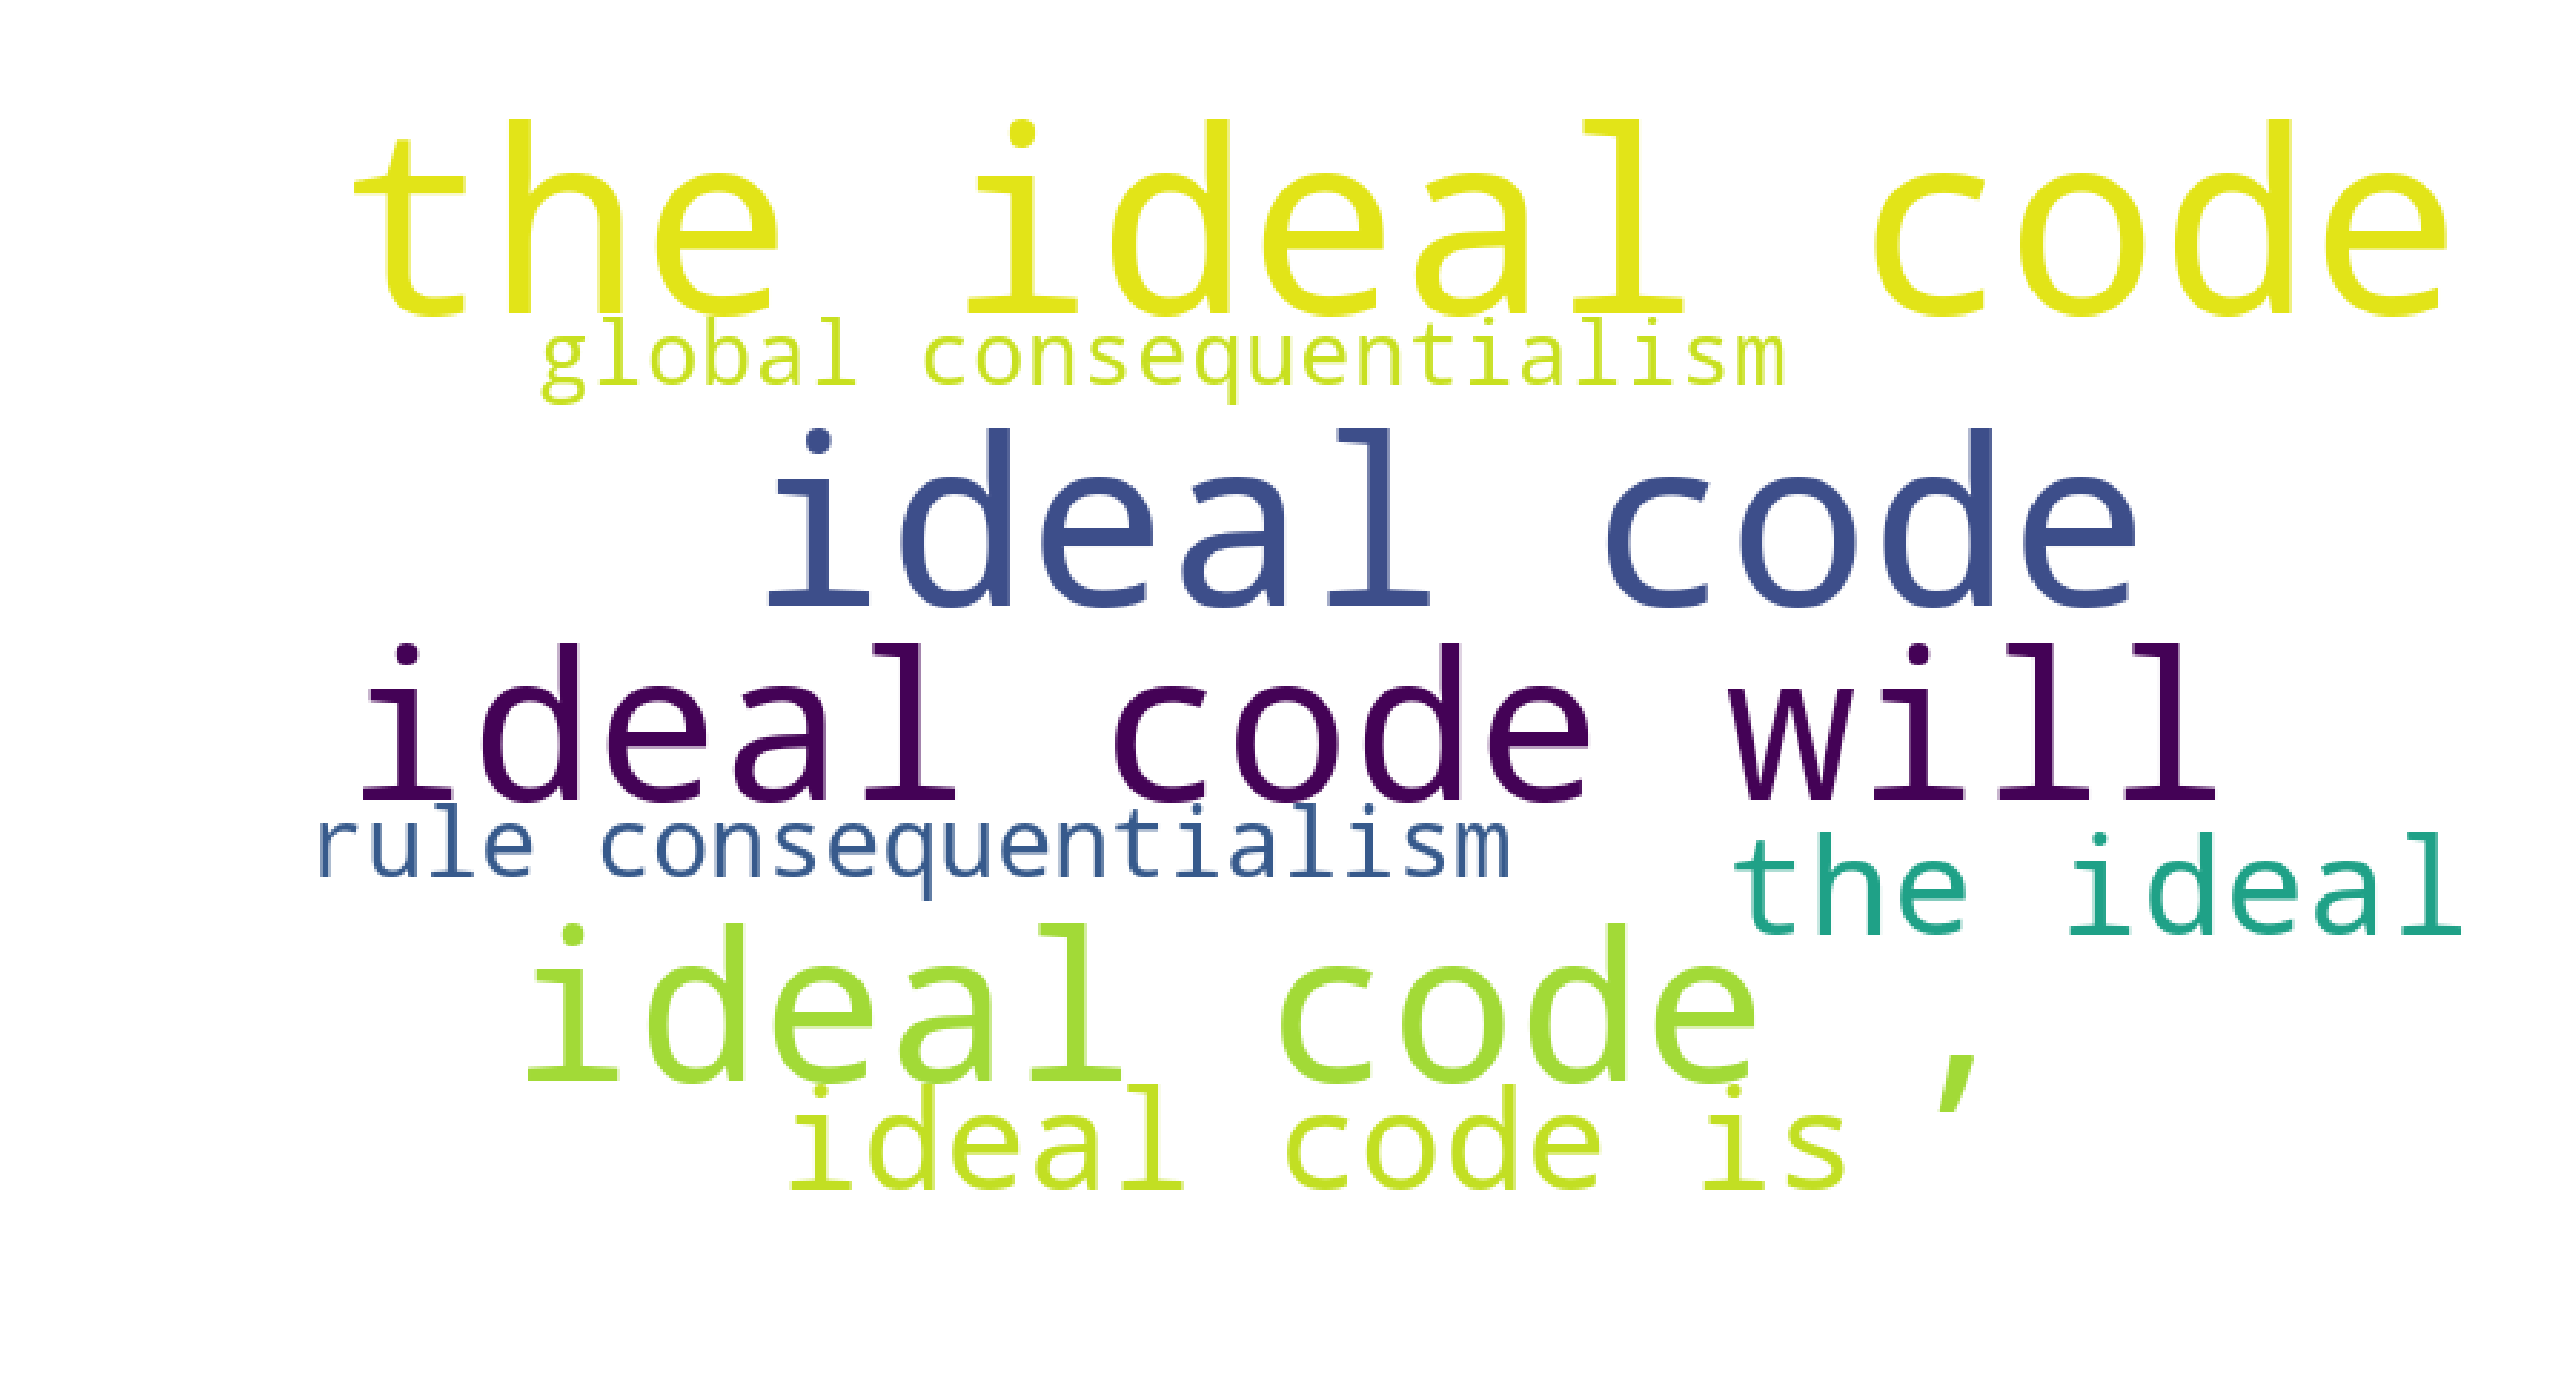

In [38]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", height=400, width=800).fit_words(cons_dic)
plt.figure(figsize=(6, 3), dpi=1000)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("consCloud.png", dpi=300)

In [62]:
def extractorForPara(n=20):
    #n is number of opinions from each year"
    filename = "../paragraphs/"
    datafiles = sorted(glob.glob(filename + "para_????"))
    test_files = []

    for d in datafiles:
        paragraphs = sorted(glob.glob(d + "/*.pkl"))
        for i, para in enumerate(paragraphs):
            if i > n:
                break
            myfile = loadDataset(para)
            for j in myfile:
                if len(j) > 200:
                    test_files.append(j)

    return test_files

In [65]:
paragraphs = extractorForPara(20) #run this without arguments for full analysis
print(paragraphs[0])
x_test_para = vectorizer.transform(paragraphs)
prediction_para = clf.decision_function(x_test_para)

NELSON, J. This was an action brought to recover damages for personal injuries sustained by the plaintiff below through the alleged negligence of the railway company, and for exposure by reason of being compelled to leave the section boarding-house of the company after being injured. On the trial a verdict was rendered against the company for the sum of $2,750.


In [66]:
#Rank paragraohs

consPara = []
deonPara = []
consScore = []
deonScore = []
for i in prediction_para:
    consScore.append(i[0])
    deonScore.append(i[1])
    

for i in range(100):
    #range determines how many 'top' paragraphs to find
    max_val = max(consScore)
    max_index = consScore.index(max_val)

    min_val = max(deonScore)
    min_index = deonScore.index(min_val)

    consPara.append(min_index)
    deonPara.append(max_index)

    consScore[max_index], deonScore[min_index] = 0, 0

print(len(consPara))
print("Strongly Consequentialist")
for i in range(10):
    print(paragraphs[consPara[i]])
    print('\n')
print("Strongly Deontologist")
for j in range(10):
    print(paragraphs[deonPara[j]])
    print('\n')

100
Strongly Consequentialist
Under FELA, a railroad has a duty to provide its employees with a reasonably safe workplace; this does not mean that a railroad has the duty to eliminate all workplace dangers, but only the "duty of exercising reasonable care to that end." Baltimore & Ohio S.W.R. Co. v. Carroll, 280 U.S. 491, 496, 50 S.Ct. 182, 74 L.Ed. 566 (1930). Grand Trunk does not dispute that it had a duty to exercise reasonable care to protect Van Gorder, an employee. Thus, Van Gorder established the duty component of the negligence standard. Van Gorder cannot, however, show that Grand Trunk breached that duty.


In Seeberger v. Farwell, 139 U. S. 608 , 11 Sup. Ct. 650 , and in Magone v. Luckemeyer, 139 U. S. 612 , 11 Sup. Ct. 651 , the tariff act imposed a duty upon dress goods composed in part of wool, and a higher duty upon goods composed wholly of wool; and the question was whether woolen goods, into which, during the process of manufacture, a small percentage of cotton threads 

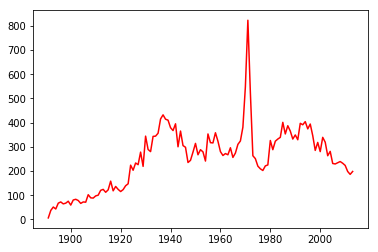

In [57]:
#for i, j in zip(attrib, prediction):
#        print('%r => %s' % (i, j))

#consPerYear = dict((yr,0) for yr in range(1891, 2014)) 
#deonPerYear = dict((yr,0) for yr in range(1891, 2014))
years = range(1891,2014)
consPerYear, deonPerYear, otherPerYear = np.zeros(len(years)), np.zeros(len(years)), np.zeros(len(years))
for i, j in zip(year_of_case, prediction):
    if j == "cons":
        consPerYear[i - 1891] += 1
    if j == "deon":
        deonPerYear[i - 1891] += 1
    if j == "other":
        otherPerYear[i - 1891] += 1
        
        
plt.plot(years, consPerYear, 'r')
#plt.plot(years, deonPerYear)
#plt.show()

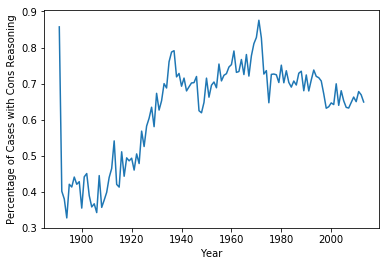

In [58]:
percentages = [] #consPerYear / cases_per_year
count = 0 
for i, j in zip(consPerYear, cases_per_year):
    if j < 1000000:
        percentages.append(i/(j-otherPerYear[count]))
    else:
        percentages.append(i/100)
    count += 1
plt.plot(years, percentages)
plt.xlabel("Year")
plt.ylabel("Percentage of Cases with Cons Reasoning")
plt.savefig("timeseries.png", dpi=300)

In [23]:
def MajVsDisExtractor():

    filename = "../sentences_new/"
    datafiles = sorted(glob.glob(filename + "sent_????"))
    test_files = []
    maj_op = []
    dis_op = []
    print(len(datafiles))
    d = datafiles[1980-1981]
    sentences = sorted(glob.glob(d + "/*.txt"))

    for i in range(len(sentences)):
        myfile = open(sentences[i],'r')
        data=myfile.read().replace('\n', '')
        if "MajOp" in sentences[i]:
            maj_op.append(data)
        elif "DisOp" in sentences[i]:
            dis_op.append(data)
    
        myfile.close()
    return maj_op, dis_op

In [24]:
majOp, disOp = MajVsDisExtractor()
majTest = vectorizer.transform(majOp)
predictionMaj = clf.predict(majTest)
disTest = vectorizer.transform(disOp)
predictionDis = clf.predict(disTest)

123


majOp, disOp = MajVsDisExtractor()
majTest = vectorizer.transform(majOp)
predictionMaj = clf.predict(majTest)
disTest = vectorizer.transform(disOp)
predictionDis = clf.predict(disTest)

0.04427832087406555
0.04986149584487535


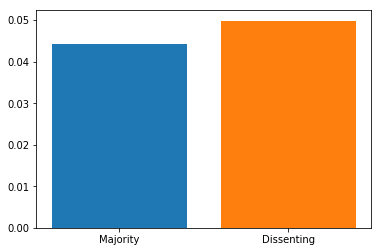

In [25]:
percentMajCons = predictionMaj.tolist().count('cons') / len(majOp)
percentDisCons = predictionDis.tolist().count('cons') / len(disOp)
plt.bar("Majority", percentMajCons)
plt.bar("Dissenting", percentDisCons)
print(percentMajCons)
print(percentDisCons)
plt.savefig("MajDis(1980-81).png")

In [26]:
def loadDataset(pklPath):
    with open(pklPath, "rb") as pklFile:
        return np.array(pickle.load(pklFile, encoding="utf-8"))

In [6]:
genis = loadDataset("../bb2genis.pkl")
md = pd.read_stata("../circuit_metadata_excerpt.dta") #md for metadata

In [13]:
#metadat experiments
#print(metadata['songername'])
#print(df.keys())
#print(type(df))
print(md)

md.keys()
md = md.set_index('caseid')

###
c = md.loc['XB0OIFQNB5G0']
print(c)
a = md.loc['XB0OIFQNB5G0']['Author'].iloc[0]
print(a)
s = c['songername']
for i, name in enumerate(s):
    if a in name:
        correctName = name

print(correctName)

###
a.iloc[0]


In [14]:
md = md.set_index('caseid') ##important

In [29]:
print(md.loc[case])

NameError: name 'case' is not defined

In [15]:

case_songername = []
bad_cases = []
for case in case_names:
    try:
        c =  md.loc[case]
        author = c['Author'].iloc[0]
        songername = c['songername']
        for i, name in enumerate(songername):   
            if author in name:
                correctName = name
            #if author == '' and name != '':
            #    correctName = name
        case_songername.append(correctName)
    except:
        case_songername.append(-1)
        bad_cases.append(case)


In [16]:
#print(case_names)
print(len(case_songername))
print(len(prediction))

427315
427315


In [17]:
bios = pd.read_stata("../JudgesBioReshaped_TOUSE.dta")

In [18]:
bios = bios.set_index('songername')

In [19]:
attributes = ['birthyear']
print(case_songername[0])
j = bios.loc[case_songername[0]]
print(j.loc['birthyear'])

def makeAtrList(atr):
    listToReturn = []
    for name in case_songername:
        try:
            judge = bios.loc[name]
            listToReturn.append(judge.loc[atr])
        except:
            listToReturn.append(-1)
    return listToReturn

NELSON, SUSAN RICHARD
1952.0


In [20]:
attributes = ['birthyear', 'presidentname', 'genderNew', 'nameofschool1', 'nameofschool2', 'nameofschool3', 'nameofschool4', 'nameofschool5',
              'raceorethnicity', 'partyaffiliationofpresident', 'placeofbirthstate']
atr = dict()    
for a in attributes:
    atr[a] = makeAtrList(a)

In [21]:
import math
error = .11 #change this
n = 77#change this
conf_int = error + 1.96 * math.sqrt((error * (1 - error)) / n) #95% confidence
print(conf_int)

#plt.bar("Female", (femCons/numFem), yerr=conf_int, capsize=20, color='pink',)
#plt.bar("Male", (malCons/numMal), yerr=conf_int, capsize=20, color='b')

0.17988791025635265


In [24]:
#Appointing President Party Affiliation
partyList = atr['partyaffiliationofpresident']
repCons = 0
demCons = 0
numRep = 0
numDem = 0
for i, j in zip(partyList, prediction):
    if i == "Democratic" and j != "other":
        numDem += 1
        if j == "cons":
            demCons +=1
    elif i == "Republican"and j != "other":
        numRep += 1
        if j == "cons":
            repCons +=1


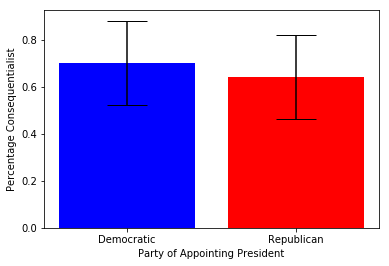

In [25]:
plt.bar("Democratic", (demCons/numDem), yerr=conf_int, capsize=20, color='b',)
plt.bar("Republican", (repCons/numRep), yerr=conf_int, capsize=20, color='r')
plt.ylabel("Percentage Consequentialist")
plt.xlabel("Party of Appointing President")
plt.savefig("party.png")

In [28]:
#By Gender
genderList = atr['genderNew']
femCons = 0
malCons = 0
numFem = 0
numMal = 0
for i, j in zip(genderList, prediction):
    if i == "M" and j != "other":
        numMal += 1
        if j == "cons":
            malCons +=1
    elif i == "F" and j != "other":
        numFem += 1
        if j == "cons":
            femCons +=1


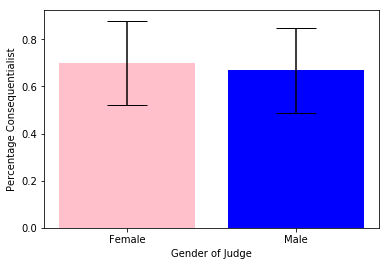

In [29]:
plt.bar("Female", (femCons/numFem), yerr=conf_int, capsize=20, color='pink',)
plt.bar("Male", (malCons/numMal), yerr=conf_int, capsize=20, color='b')
plt.ylabel("Percentage Consequentialist")
plt.xlabel("Gender of Judge")
plt.savefig("genderbar.png", dpi=300)

In [39]:
school1 = atr['nameofschool1']
school2 = atr['nameofschool2']
school3 = atr['nameofschool3']
school4 = atr['nameofschool4']
school5 = atr['nameofschool5']

schoolSet = set(school1+school2+school3+school4+school5)
schoolCons = dict()
#schoolTotal = dict(schoolSet)
schoolTotal = dict.fromkeys(schoolSet, 0)
schoolCons = dict.fromkeys(schoolSet, 0)

#assuming last school attended is the law school

for a, b, c, d, e, pred in zip(school1, school2, school3, school4, school5, prediction):
    if e != '' and pred != "other":
        schoolTotal[e] += 1
        if pred == 'cons':
            schoolCons[e] += 1
    elif d != '' and pred != "other":
        schoolTotal[d] += 1
        if pred == 'cons':
            schoolCons[d] += 1
    elif c != '' and pred != "other":
        schoolTotal[c] += 1
        if pred == 'cons':
            schoolCons[c] += 1
    elif b != '' and pred != "other":
        schoolTotal[b] += 1
        if pred == 'cons':
            schoolCons[b] += 1
    elif a != '' and pred != "other":
        schoolTotal[a] += 1
        if pred == 'cons':
            schoolCons[a] += 1
    else:
        pass

total = sum(schoolTotal.values())
consTotal = sum(schoolCons.values())
overallPercentage = consTotal / total
percentDict = dict()
for i in schoolTotal.keys():
    if schoolTotal[i] > 30:
        p = schoolCons[i]/schoolTotal[i]
        percentDict[i] = (p/overallPercentage) -1


 
#x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
sorted_percentDict = sorted(percentDict.items(), key=operator.itemgetter(1))
for i in sorted_percentDict:
    print(i)

#print(sorted_percentDict)
        
#print(schoolTotal)
#print(schoolCons)


('Cincinnati Law School (now University of Cincinnati College of Law)', -0.5111159322469707)
('Kentucky University (later Transylvania University) Department of Law', -0.455906438507267)
('University of Missouri School of Law', -0.2478706649953396)
('Loyola University New Orleans School of Law', -0.20608570193952513)
('Indiana University School of Law -- Indianapolis (now McKinney School of Law)', -0.1726577314948735)
('Lake Forest University', -0.15144382717422933)
('University of North Dakota School of Law', -0.14412868775331744)
('Syracuse University College of Law', -0.14372968014854048)
('University of Michigan Law School', -0.13878320419313706)
('Read law', -0.1356038733047754)
('Boston University School of Law', -0.13134358492419507)
('St. Louis University School of Law', -0.1181931934428121)
('University of Nebraska College of Law', -0.10013097419085282)
('Washington University School of Law', -0.09744479799440764)
('University of Iowa College of Law', -0.09457041837018598)
('Y

In [49]:
#birthyear, nameofschool1, degree_law, raceorethnicity, placeofbirthstate, partyaffiliationofrenompres, genderNew, party
# political_party,
states = atr['placeofbirthstate']

stateSet = set(states)
stateTotal = dict.fromkeys(stateSet, 0)
stateCons = dict.fromkeys(stateSet, 0)

for state, pred in zip(states, prediction):
    if state != '' and pred != "other":
        stateTotal[state] += 1
        if pred == 'cons':
            stateCons[state] += 1
            
for s in stateSet:
    if stateTotal[s] != 0:
        statePercentages[s] = stateCons[s]/stateTotal[s]
    else:
        statePercentages[s] = 0
print(statePercentages)


{'ND': 0.6044776119402985, 'GA': 0.780373831775701, 'Italy': 0.6494845360824743, 'NM': 0.5806451612903226, 'AR': 0.6439393939393939, 'TX': 0.7404393816110659, 'CT': 0.6565315315315315, 'SD': 0.6291390728476821, 'WA': 0.6631016042780749, 'WV': 0.6666666666666666, 'WY': 0.6091954022988506, 'NC': 0.5862068965517241, 'Columbia': 1.0, 'OH': 0.5482295482295483, 'Norway': 0.25, 'FL': 0.7051597051597052, 'Spain': 0.8333333333333334, 'England': 0, 'MO': 0.5279850746268657, 'OR': 0.7043478260869566, 'MN': 0.7380952380952381, 'Austria': 1.0, 'CO': 0.7208480565371025, 'Canada': 0.49065420560747663, 'LA': 0.7427385892116183, 'ME': 0.5742296918767507, 'UT': 0.7512562814070352, 'France': 1.0, ' ': 0, 'IA': 0.6409861325115562, 'KS': 0.6794625719769674, 'ID': 0.7878787878787878, 'MT': 0.7938931297709924, 'MA': 0.7171428571428572, 'Mexico': 0.76, 'NH': 0.5140562248995983, 'Poland': 0.0, 'Venezuela': 0, 'OK': 0.696, 'India': 0, 'Cuba': 0.7222222222222222, 'Saudi Arabia': 0.7586206896551724, 'NY': 0.69277

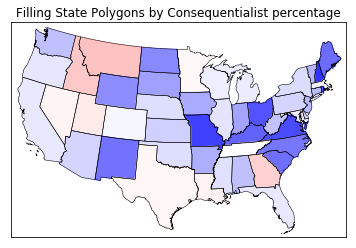

In [50]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

colors={}
statenames=[]
cmap = plt.cm.bwr # use 'hot' colormap
vmin = .46; vmax = 1 # set range.
#print(m.states_info)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        #change state name to stae initials
        state_initial = us_state_abbrev[statename]
        pop = statePercentages[state_initial]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        #colors[statename] = cmap(1.-(np.sqrt((pop-vmin)/(vmax-vmin))))[:3]
        colors[statename] = cmap((pop-vmin)/(vmax-vmin))
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

#plt.colorbar(m)
#plt.colorbar()
plt.title('Filling State Polygons by Consequentialist percentage')
#plt.show()
plt.savefig("map.png")